The goal of this notebook is to play around with displaying image data in python. We'll access an example file from google drive (you should have received an email granting you access to the file) and look at it in a few different ways.

In [1]:
# start by importing a few essential packages
import numpy as np
import matplotlib.pyplot as plt
import astropy

from astropy.io import fits

Next, we'll load in a file and take a look. I've saved my data in google drive so the next line tells python to go look in MyDrive. You'll need to either put your data on google drive or tell google drive where to look in your computer for your data.

Second, you have to give colab access to your data. Use the tools on the left to do this. First, click on the file folder. There should be four vertical icons across the top. Click the third from left - a file folder with the google drive symbol on it. This should grant access. Try it by running the next line.

In [2]:
import glob
ex_files= glob.glob('/content/drive/MyDrive/ASTR230/example_data/*.fits')

The line above basically says to go look in a given folder and return the filename of everything that starts with 'obj' and ends with '.fits'.

Running this locally on your own computer? Make sure that the file path points to the place where your data live. The file path is the text in quotes. The equivalent on my computer might look something like '/Users/mr82/teaching/data_for_ASTR230/example_data/*.fits'. Words between slashes are the names of folders (or directories if you are familiar with the command line). So the folder 'lab_data' is a sub-folder of the bigger 'data' folder, etc.

If colab has access to your files, you should be able to see a list of filenames in your directory when you print the contents of m101_files. If access has *not* been granted, this will return an empty list [].

In [3]:
ex_files

['/content/drive/MyDrive/ASTR230/example_data/jw02731-o001_t017_nircam_f444w-f470n_i2d.fits']

In [4]:
im = fits.open(ex_files[0])

In [5]:
im

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7dd4e1c79fd0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7dd4e1be8910>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7dd4e1beb750>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7dd4e2862d90>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7dd4e1bea950>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7dd4e1aa4cd0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7dd4e1c8ce50>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7dd4e1aa5d10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7dd4e1a7f490>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7dd4e1a6c190>]

Notice that this file has many extenions. If we try looking for just the data part with specifying an extension, we'll get an error.

In [7]:
im.data

AttributeError: 'HDUList' object has no attribute 'data'

In [8]:
type(im)

astropy.io.fits.hdu.hdulist.HDUList

Notice that 'im' is a list of header data units (hdus). We can access an image by specifying which element (which fits extension) we wish to view. You can change the numbers to see what the data in other extensions looks like.

In [9]:
im[1].data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype='>f4')

If we have the correct hdu extension, the line above should print a few partial rows and columns of the data. We can also check to see how large the array is.

In [10]:
im[1].data.shape

(4180, 7061)

We can use the .header extension to look at the image header[s] too.

In [11]:
im[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-07-13T00:17:04.019' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw02731-o001_t017_nircam_f444w-f470n_i2d.fits' / Name of the file    
SDP_VER = '2022_2a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-055'      / S&OC PRD version number used in data processing
OSS_VER = '8.4.5.2 '           / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.5.3   '        

Now let's take a look at the data itself. We'll use matplotlib's imshow for this.

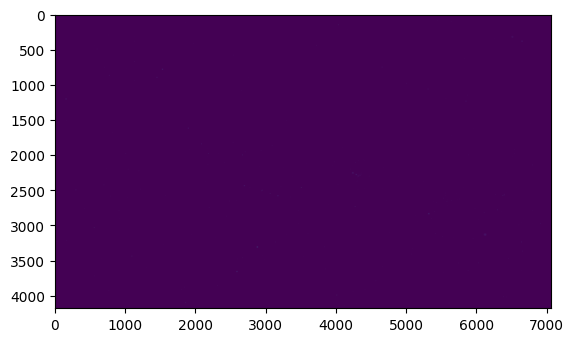

In [12]:
plt.imshow(im[1].data)

Notice the y-axis - the orientation is opposite to how we usually plot data. We can get a more familiar orientation using the keyword origin='lower' in imshow.

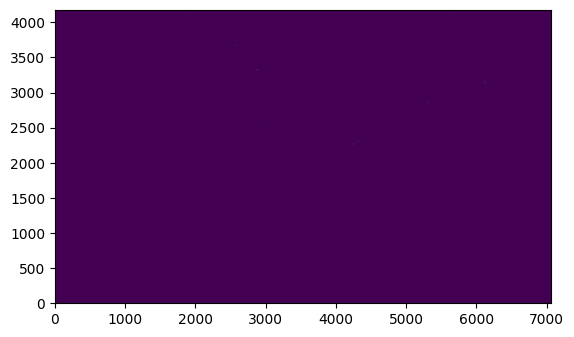

In [13]:
plt.imshow(im[1].data, origin='lower')

Now the orientation looks better but the image is still all one color. For different data, you may be able to see a few saturated stars (bright points with lines streaking out from them).

We can change the colorscaling to make the image easier to see using the keywords vmin and vmax. What values should you use? How can you make a good starting guess? You could play around with image scaling in ds9 first then put those numbers in here but that is not always practical.

I like to start by plotting a colorbar to get an idea of the range of the data, then printing the median to see where most of the data are.

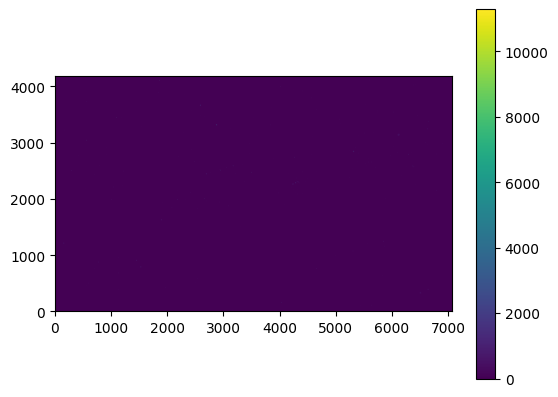

In [14]:
plt.imshow(im[1].data, origin='lower')
plt.colorbar()

Most pixels have values in what range? How does this compare to what you saw in the 'Scale Parameters' graph in ds9?

In [15]:
np.median(im[1].data)

3.0322924

Does this make sense with what you see with the colorbar?

Use this to make a first guess for vmin and vmax. You can always change these later to improve the contrast. The goal for now is to see something in the image.

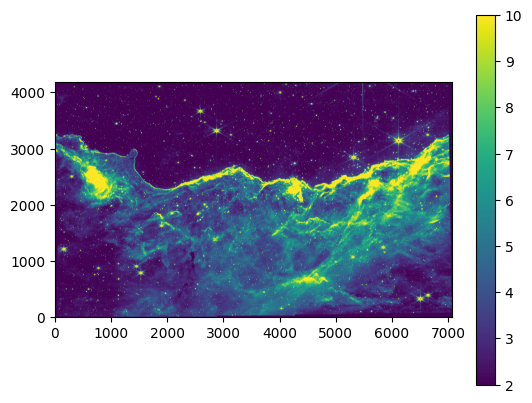

In [16]:
plt.imshow(im[1].data, origin='lower', vmin=2, vmax=10)
plt.colorbar()

Notice that the colorbar now reflects the min and max values displayed. This means every pixel with a value $\leq$2 is the same color (dark purple) and every pixel with a value $\geq$10 has the same color (yellow).

You can also change the colorscale. In the bad old days, images were usually shown in black and white because color printing was very expensive. You can do this by setting the 'cmap.'

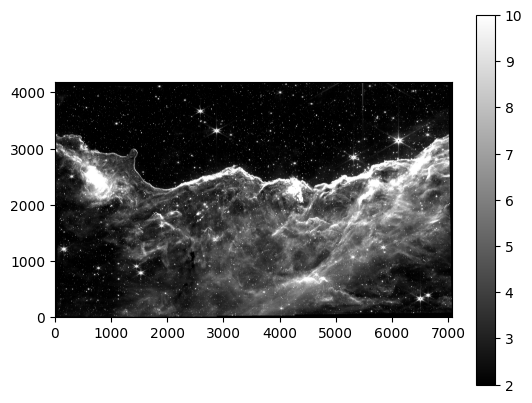

In [17]:
plt.imshow(im[1].data, origin='lower', vmin=2, vmax=10, cmap='gray')
plt.colorbar()

Now the pixels with the lowest values are all dark while the brightest pixels are white - kind of like how we see the night sky. This isn't always the easiest way to see detail in data and uses _a lot_ of ink when printed out (some people still do!), so often images are displayed with an inverse colorscale.  

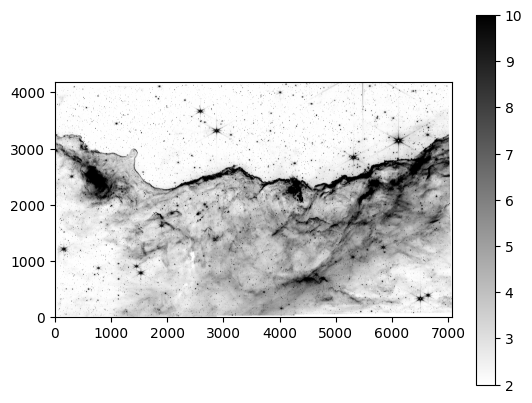

In [18]:
plt.imshow(im[1].data, origin='lower', vmin=2, vmax=10, cmap='gray_r')
plt.colorbar()

Play around with the minimum and maximum values until you have brought out as much structure in your image as possible.

In [19]:
# your code here
# you can add as many cells as you need

Now let's zoom in on part of the image to look at it in more detail.

First, let's remind ourselves how big the image is in pixels.

In [20]:
im[1].data.shape

(4180, 7061)

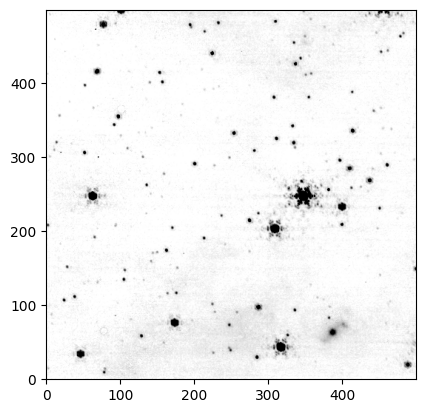

In [21]:
plt.imshow(im[1].data[250:750,250:750], origin='lower', vmin=2, vmax=10, cmap='gray_r')

This is a square zoom. Try playing around with the axes individually. Which index changes the y-axis - the first or the second?

Then, pick something interesting in your image and zoom in to give us a good view of the object.

In [22]:
# your code here